In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
os.chdir('C:\\RESEARCH\\LUAD\\Site')

In [3]:
X=pd.read_excel('Genes_Clinical_Site.xlsx',index_col=0)

In [4]:
X.shape

(517, 15148)

In [5]:
x=X.iloc[:,0:15146].values
y=X.iloc[:,-1].values

In [6]:
y

array(['R-Lower', 'R-Lower', 'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Lower', 'R-Middle', 'R-Upper', 'R-Lower',
       'R-Upper', 'R-Lower', 'L-Upper', 'L-Lower', 'R-Upper', 'L-Lower',
       'R-Lower', 'L-Lower', 'R-Upper', 'R-Middle', 'L-Lower', 'L-Upper',
       'L-Lower', 'R-Upper', 'L-Lower', 'R-Lower', 'L-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'L-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Lower',
       'L-Upper', 'R-Upper', 'R-Upper', 'R-Lower', 'R-Lower', 'L-Upper',
       'R-Upper', 'L-Lower', 'R-Upper', 'L-Lower', 'L-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper',
       'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper'

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
y

array([3, 3, 3, 1, 3, 5, 5, 1, 3, 4, 5, 3, 5, 3, 1, 0, 5, 0, 3, 0, 5, 4,
       0, 1, 0, 5, 0, 3, 1, 1, 5, 5, 1, 1, 5, 1, 5, 1, 5, 1, 5, 5, 5, 5,
       1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 3, 1, 5, 5, 3, 3, 1,
       5, 0, 5, 0, 0, 5, 5, 1, 5, 5, 1, 5, 3, 1, 3, 5, 1, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 1, 3, 3, 1, 0, 1, 1, 5, 3, 1, 5, 1, 4, 1, 1, 5, 1, 1,
       5, 4, 0, 5, 3, 5, 1, 2, 5, 3, 1, 5, 1, 3, 3, 3, 5, 1, 0, 5, 5, 3,
       1, 5, 1, 5, 0, 1, 3, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 1, 5, 3, 5, 3,
       5, 3, 5, 5, 5, 5, 1, 1, 3, 0, 5, 5, 5, 3, 1, 3, 1, 5, 0, 5, 0, 4,
       1, 3, 1, 3, 0, 0, 1, 3, 0, 3, 4, 5, 3, 5, 5, 5, 5, 1, 3, 0, 1, 1,
       3, 5, 3, 1, 0, 4, 0, 5, 5, 1, 0, 5, 5, 3, 3, 5, 1, 1, 5, 3, 1, 3,
       5, 0, 5, 5, 3, 3, 3, 5, 5, 5, 3, 5, 3, 0, 5, 1, 4, 5, 3, 1, 0, 0,
       0, 5, 5, 0, 5, 5, 3, 3, 5, 1, 0, 5, 3, 3, 1, 5, 3, 1, 0, 1, 3, 0,
       3, 5, 1, 3, 3, 3, 4, 5, 4, 5, 5, 1, 5, 0, 5, 5, 5, 1, 5, 0, 0, 3,
       3, 4, 1, 3, 0, 4, 5, 5, 4, 1, 5, 5, 5, 3, 3,

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [11]:
# Fitting K-NN to the Validation set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [14]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]) / cm.sum())
accuracy

0.3373493975903614

Confusion Matrix, without normalization
[[ 1  0  0  1  0  6]
 [ 2  1  0  2  0 13]
 [ 1  0  0  0  0  0]
 [ 4  1  0  4  0 11]
 [ 0  1  0  0  0  4]
 [ 2  2  0  5  0 22]]


<Figure size 720x504 with 0 Axes>

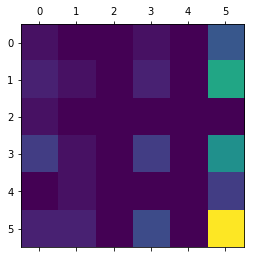

In [15]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.125      0.         0.         0.125      0.         0.75      ]
 [0.11111111 0.05555556 0.         0.11111111 0.         0.72222222]
 [1.         0.         0.         0.         0.         0.        ]
 [0.2        0.05       0.         0.2        0.         0.55      ]
 [0.         0.2        0.         0.         0.         0.8       ]
 [0.06451613 0.06451613 0.         0.16129032 0.         0.70967742]]


<Figure size 432x288 with 0 Axes>

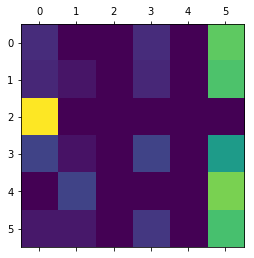

In [16]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [17]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.10      0.12      0.11         8
           1       0.20      0.06      0.09        18
           2       0.00      0.00      0.00         1
           3       0.33      0.20      0.25        20
           4       0.00      0.00      0.00         5
           5       0.39      0.71      0.51        31

   micro avg       0.34      0.34      0.34        83
   macro avg       0.17      0.18      0.16        83
weighted avg       0.28      0.34      0.28        83



C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.04216970542687916

In [19]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.3455882113353651

In [ ]:
"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
